In [ ]:
import numpy as np
from qiskit import *
t = 1
y = 2
x = 4
circ = QuantumCircuit(x)
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.

circ.h(0)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circ.x(y)

# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circ.cx(0, y)
circ.draw('mpl')


In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def multiply_quantum_circuit(a, b):
    # a和b是两个二进制数的字符串表示，例如 "101" 和 "110"
    n = max(len(a), len(b))

    # 创建一个量子电路，有2n个量子比特和n+1个经典比特
    qc = QuantumCircuit(2 * n, n + 1)

    # 初始化输入比特
    for i in range(len(a)):
        if a[i] == '1':
            qc.x(i)

    for i in range(len(b)):
        if b[i] == '1':
            qc.x(i + n)

    # 实现乘法操作
    for ctrl in range(n):
        for i in range(n):
            qc.cx(ctrl, n + i)

    # 实现累加器
    for i in range(n):
        qc.measure(n + i, i)

    # 使用Aer模拟器运行量子电路
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()

    # 绘制测量结果的直方图
    counts = result.get_counts(qc)
    return counts

# 示例：计算二进制数 "101" 和 "110" 的乘积
result_counts = multiply_quantum_circuit("101", "110")
plot_histogram(result_counts)



In [ ]:
from qiskit.circuit.library import MCXGate
gate = MCXGate(7)
 
from qiskit import QuantumCircuit
circuit = QuantumCircuit(31)
circuit.append(gate, [0, 1 ,2, 3, 4, 5, 6, 30])#门的名称，控制位，控制目标

circuit.draw('mpl')

In [ ]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.x(0)  # Add X-gate to qubit 
qc.draw("mpl")

In [ ]:
from qiskit.circuit.library import HGate
 
qc = QuantumCircuit(1)
qc.append(
    HGate(),  # New HGate instruction
    [0]       # Apply to qubit 0
)
qc.draw("mpl")

In [ ]:
# Draw a new circuit with barriers and more registers
 
q_a = QuantumRegister(3, name='qa')
q_b = QuantumRegister(5, name='qb')
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)
 
circuit = QuantumCircuit(q_a, q_b, c_a, c_b)
 
circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);
# Draw the circuit with reversed bit order
# Draw the circuit
circuit.draw(output='mpl', reverse_bits=True)

In [ ]:
from qiskit_aer import Aer
 
from qiskit import *
from qiskit.visualization import plot_histogram

In [ ]:
import itertools

# 定义XYZ的取值范围
X_values = [-1, 0, 1]
Y_values = [-1, 0, 1]
Z_values = [-1, 0, 1]

# 生成所有可能的XYZ组合
combinations = list(itertools.product(X_values, Y_values, Z_values))

# 按从小到大的顺序排列组合
sorted_combinations = sorted(combinations)

# 输出结果
for combo in sorted_combinations:
    print(combo)


In [ ]:
from qiskit.circuit.library import DraperQFTAdder

adder = DraperQFTAdder(2).decompose()
adder.draw(output="mpl")

{4: 1.0}


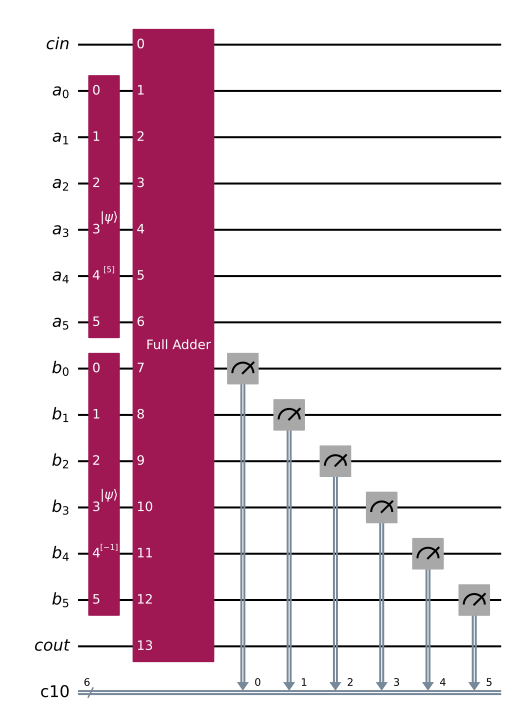

In [11]:
from qiskit.circuit.library import CDKMRippleCarryAdder
from qiskit.primitives import Sampler
 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
adder = CDKMRippleCarryAdder(6, 'full', 'Full Adder')  # Adder of 3-bit numbers
# Create the number A=2
reg_a = QuantumRegister(6, 'a')
number_a = QuantumCircuit(reg_a)
number_a.initialize(5)                 #  Number 2; |010>
 
# Create the number B=3
reg_b = QuantumRegister(6, 'b')
number_b = QuantumCircuit(reg_b)
number_b.initialize(-1)#Number 2; |010>
# Create a circuit to hold everything, including a classical register for
# the result
reg_result = ClassicalRegister(6)
circuit = QuantumCircuit(*adder.qregs, reg_result)
 
# Compose number initializers with the adder. Adder stores the result to
# register B, so we'll measure those qubits.
circuit = circuit.compose(number_a, qubits=reg_a).compose(number_b, qubits=reg_b).compose(adder)
circuit.measure(reg_b, reg_result)

 
result = Sampler().run(circuit).result()
x=result.quasi_dists[0]
print(x)
circuit.draw('mpl')

In [6]:
adder = CDKMRippleCarryAdder(3, 'full', 'Full Adder')

# Here we create a quantum register for each operand and another one for the carry in and carry out.
# We can also use a single 8-qubit register.
operand1 = QuantumRegister(3, 'o1')
operand2 = QuantumRegister(3, 'o2')
anc = QuantumRegister(2, 'a')
cr = ClassicalRegister(4)

circ = QuantumCircuit(operand1, operand2, anc, cr)

# For testing purposes we set 1st operand to equal 3
circ.x([operand1[0], operand1[1]])
# and 2nd operand to equal 5
circ.x([operand2[0], operand2[2]])

# Note 1: CDKMRippleCarryAdder expects the qubits to have the order: carry in - 1st operand - 2nd operand - carry out.
# Note 2: Python uses '+' operator to combine lists:
circ.append(adder, [anc[0]] + operand1[0:3] + operand2[0:3] + [anc[1]])

# The adder writes the result in place of 2nd operand and carry-out: 
circ.measure(operand2[0:3] + [anc[1]], cr)
simulator = Aer.get_backend('qasm_simulator')
tr_circ = transpile(circ, basis_gates = ['u3', 'cx'], optimization_level = 3)
result = simulator.run(tr_circ).result()
counts = result.get_counts()

# The result must be 8 (in binary, 1000)
print(list(counts.keys())[0])

circ.draw('mpl')

NameError: name 'Aer' is not defined

{'0010001011': 1024}


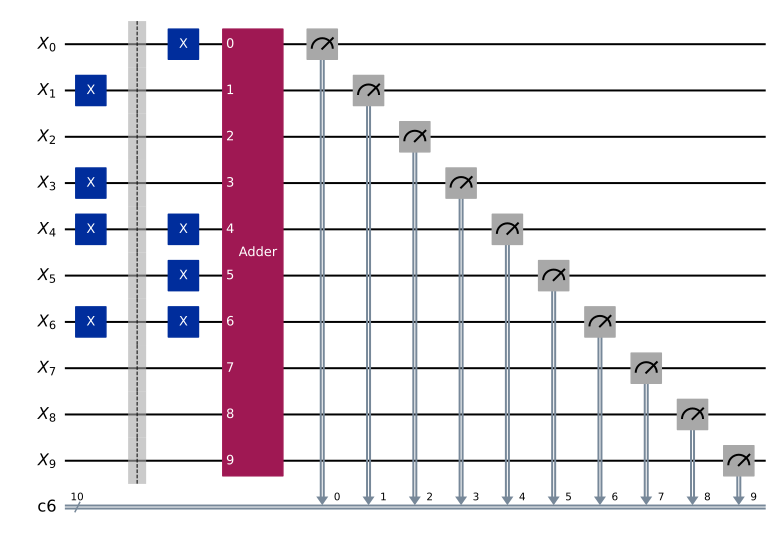

In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import VBERippleCarryAdder
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler


num_state_qubits = 3
adder = VBERippleCarryAdder(num_state_qubits, name=' Adder ')
num_qubits = len(adder.qubits)
q_X = QuantumRegister(num_qubits, name='X')
c_X = ClassicalRegister(num_qubits)
circuit = QuantumCircuit(q_X,c_X)
# Five
circuit.x([1, 3])

# Three
circuit.x([num_state_qubits + 1,num_state_qubits + 3])

circuit.barrier()
# Subtraction:
# 1) invert b:
circuit.x(range(num_state_qubits + 1, 2 * num_state_qubits + 1))

# 2) add one (using carry-in)
circuit.x(0)

# 3) do the addition
circuit.append(adder, range(num_qubits))

circuit.measure(q_X,c_X)
simulator = Aer.get_backend('qasm_simulator')
tr_circ = transpile(circuit, basis_gates = ['u3', 'cx'], optimization_level = 3)
result = simulator.run(tr_circ).result()
counts = result.get_counts()
print(counts)
circuit.draw('mpl')